# 01. Importing libraries

In [1]:
# Import libraries
import warnings
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from pandas.core.common import SettingWithCopyWarning
from scipy.stats import norm

# 02. Importing data

In [2]:
# Define csv path
path = r'C:\Users\lucav\Desktop\Instacart Basket Analysis'

In [3]:
# Import data from 'orders_products_merged.pkl'
warnings.simplefilter(action='ignore', category=FutureWarning) # Added to ignore warnings
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged_frequencies&flags.pkl'))

# 03. Creating bar charts

<AxesSubplot:>

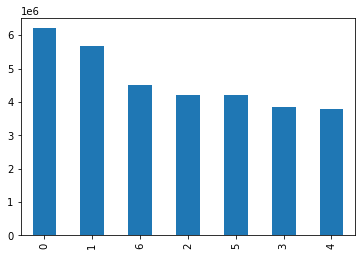

In [5]:
# Create a bar chart for 'orders_day_of_week' column
ords_prods_merge['day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

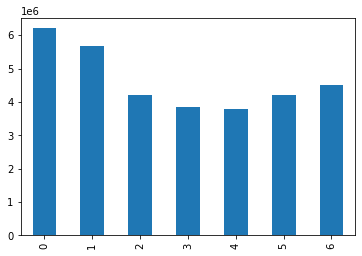

In [7]:
# Create a bar chart for 'day_of_week' column sorted by 'day_of_week'
ords_prods_merge['day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

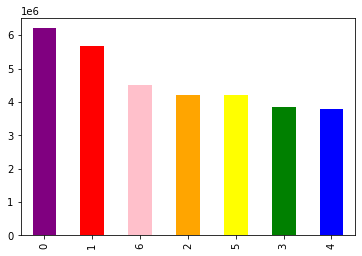

In [9]:
# Create a bar chart for 'day_of_week' column sorted by 'day_of_week' with colours
ords_prods_merge['day_of_week'].value_counts().plot.bar(color=['purple','red','pink','orange','yellow','green','blue'])

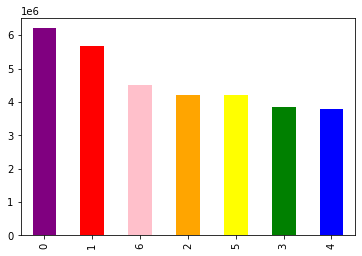

In [10]:
# Save the bar chart within the 'bar' object
bar = ords_prods_merge['day_of_week'].value_counts().plot.bar(color=['purple','red','pink','orange','yellow','green','blue'])

In [11]:
# Export the 'bar' object as an image (.png)
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# 04. Creating histograms and scatterplots

<AxesSubplot:ylabel='Frequency'>

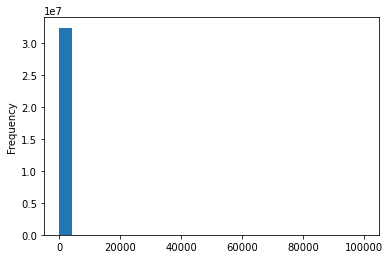

In [12]:
# Create a histogram of the 'prices' column
ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

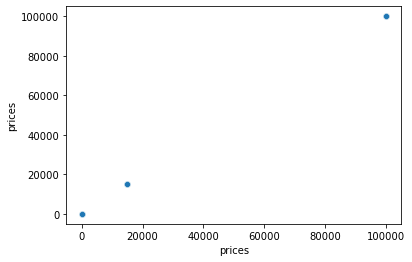

In [13]:
# Create a scatterplot of the 'prices' column
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [14]:
# Determine whether there are any values above 100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,day_of_week,hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,customer_spending,spending_flag,order_frequency,order_frequency_flag
10030345,912404,17,12,2,14,5.0,False,21553,5,0,...,14900.0,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,False,21553,3,1,...,14900.0,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,False,21553,6,0,...,14900.0,High-range product,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,False,21553,3,1,...,14900.0,High-range product,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,False,21553,9,0,...,14900.0,High-range product,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,False,33664,1,0,...,99999.0,High-range product,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,False,33664,1,1,...,99999.0,High-range product,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,False,33664,25,0,...,99999.0,High-range product,Slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,False,33664,8,0,...,99999.0,High-range product,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [15]:
# Mark those values as missing
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [16]:
# Run a max-value check on 'prices' column
ords_prods_merge['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

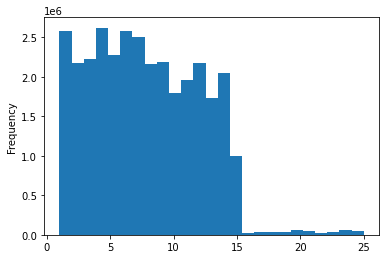

In [17]:
# Create a histogram of the 'prices' column
ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:ylabel='Frequency'>

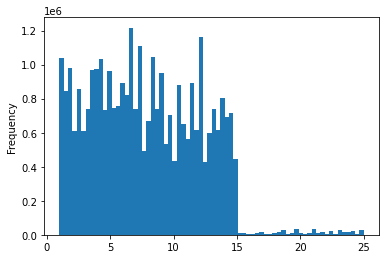

In [18]:
# Create a histogram of the 'prices' column using a higher granularity (70 bins)
ords_prods_merge['prices'].plot.hist(bins = 70)

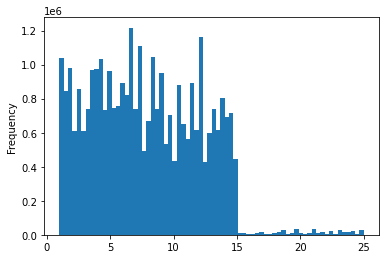

In [19]:
# Save the histogram within the 'hist' object
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [20]:
# Export the 'hist' object as an image (.png)
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

# 05. Creating line charts

In [22]:
# Create a subset sampling the data based on a 70/30 ratio

# Set the seed to generate a reproducible pattern
np.random.seed(4)

# Store the boolean values in 'dev' list
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

# Split 'ords_prods_merge' into two samples
big = ords_prods_merge[dev] # The True values in 'dev' are stored in 'big' (70% of the total dataframe)
small = ords_prods_merge[~dev] # The False values in 'dev' are stored in 'small' (30% of the total dataframe)

In [23]:
# Verify whether 'big' + 'small' is equal to the total dataframe
len(ords_prods_merge) == len(big) + len(small)

True

In [25]:
# Select only 'prices' and 'day_of_week' columns
df_2 = small[['day_of_week','prices']]

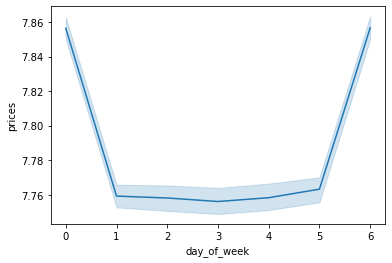

In [28]:
# Create a line chart of 'df_2' and store it within 'line' object
line = sns.lineplot(data = df_2, x = 'day_of_week',y = 'prices')

In [30]:
# Export the 'line' object as an image (.png)
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))